<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Jose_Miguel-Guerrero_Arias/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n_A01793075.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6, visualización
#José Miguel Guerrero Arias, A01793075
# Ciencia y analítica de datos
# María de la Paz Rico Fernández
#2022/11/01

#1.Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí.

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import power_transform, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline


In [2]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

#se guarda el path

In [4]:
df = pd.read_csv(path,
                 index_col= 0)
df.index.name = None
df.rename({
    'Y':'default_payment',    
    'X1':'total_given_credit',
    'X2':'gender',
    'X3':'education',
    'X4':'marital_status',
    'X5':'age',
    'X6':'repay_status_sep',
    'X7':'repay_status_ago',
    'X8':'repay_status_jul',
    'X9':'repay_status_jun',
    'X10':'repay_status_may',
    'X11':'repay_status_apr',
    'X12':'amount_bill_statement_sep',
    'X13':'amount_bill_statement_ago',       
    'X14':'amount_bill_statement_jul',
    'X15':'amount_bill_statement_jun',
    'X16':'amount_bill_statement_may',
    'X17':'amount_bill_statement_apr',
    'X18':'amount_prv_payment_sep',
    'X19':'amount_prv_payment_ago',
    'X20':'amount_prv_payment_jul',
    'X21':'amount_prv_payment_jun',
    'X22':'amount_prv_payment_may',
    'X23':'amount_prv_payment_apr'},
    
    axis='columns',
    inplace=True)
df.head()

#se agrega la fuente en un dataframe, se asignan nombre de columnas

,total_given_credit,gender,education,marital_status,age,repay_status_sep,repay_status_ago,repay_status_jul,repay_status_jun,repay_status_may,...,amount_bill_statement_jun,amount_bill_statement_may,amount_bill_statement_apr,amount_prv_payment_sep,amount_prv_payment_ago,amount_prv_payment_jul,amount_prv_payment_jun,amount_prv_payment_may,amount_prv_payment_apr,default_payment
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


#2.Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
df.shape

(30000, 24)

In [17]:
columnas = df.columns
print(columnas)

Index(['total_given_credit', 'gender', 'education', 'marital_status', 'age',
       'repay_status_sep', 'repay_status_ago', 'repay_status_jul',
       'repay_status_jun', 'repay_status_may', 'repay_status_apr',
       'amount_bill_statement_sep', 'amount_bill_statement_ago',
       'amount_bill_statement_jul', 'amount_bill_statement_jun',
       'amount_bill_statement_may', 'amount_bill_statement_apr',
       'amount_prv_payment_sep', 'amount_prv_payment_ago',
       'amount_prv_payment_jul', 'amount_prv_payment_jun',
       'amount_prv_payment_may', 'amount_prv_payment_apr', 'default_payment'],
      dtype='object')


In [7]:
df.dtypes

total_given_credit             int64
gender                       float64
education                    float64
marital_status               float64
age                          float64
repay_status_sep             float64
repay_status_ago             float64
repay_status_jul             float64
repay_status_jun             float64
repay_status_may             float64
repay_status_apr             float64
amount_bill_statement_sep    float64
amount_bill_statement_ago    float64
amount_bill_statement_jul    float64
amount_bill_statement_jun    float64
amount_bill_statement_may    float64
amount_bill_statement_apr    float64
amount_prv_payment_sep       float64
amount_prv_payment_ago       float64
amount_prv_payment_jul       float64
amount_prv_payment_jun       float64
amount_prv_payment_may       float64
amount_prv_payment_apr       float64
default_payment              float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_given_credit         30000 non-null  int64  
 1   gender                     29999 non-null  float64
 2   education                  29998 non-null  float64
 3   marital_status             29998 non-null  float64
 4   age                        29995 non-null  float64
 5   repay_status_sep           29997 non-null  float64
 6   repay_status_ago           29995 non-null  float64
 7   repay_status_jul           29993 non-null  float64
 8   repay_status_jun           29991 non-null  float64
 9   repay_status_may           29984 non-null  float64
 10  repay_status_apr           29986 non-null  float64
 11  amount_bill_statement_sep  29989 non-null  float64
 12  amount_bill_statement_ago  29989 non-null  float64
 13  amount_bill_statement_jul  29987 non-null  flo

In [11]:
df.isna().sum()

total_given_credit            0
gender                        1
education                     2
marital_status                2
age                           5
repay_status_sep              3
repay_status_ago              5
repay_status_jul              7
repay_status_jun              9
repay_status_may             16
repay_status_apr             14
amount_bill_statement_sep    11
amount_bill_statement_ago    11
amount_bill_statement_jul    13
amount_bill_statement_jun    15
amount_bill_statement_may    17
amount_bill_statement_apr    10
amount_prv_payment_sep        8
amount_prv_payment_ago        9
amount_prv_payment_jul        8
amount_prv_payment_jun       11
amount_prv_payment_may       11
amount_prv_payment_apr        5
default_payment               3
dtype: int64

#3.Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [12]:
#se limpia el dataset, se eliminan las filas que no tiene datos en al menos una de las columnas
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace=True)
df

,total_given_credit,gender,education,marital_status,age,repay_status_sep,repay_status_ago,repay_status_jul,repay_status_jun,repay_status_may,...,amount_bill_statement_jun,amount_bill_statement_may,amount_bill_statement_apr,amount_prv_payment_sep,amount_prv_payment_ago,amount_prv_payment_jul,amount_prv_payment_jun,amount_prv_payment_may,amount_prv_payment_apr,default_payment
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29954,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29955,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29956,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [13]:
df.isna().sum()

total_given_credit           0
gender                       0
education                    0
marital_status               0
age                          0
repay_status_sep             0
repay_status_ago             0
repay_status_jul             0
repay_status_jun             0
repay_status_may             0
repay_status_apr             0
amount_bill_statement_sep    0
amount_bill_statement_ago    0
amount_bill_statement_jul    0
amount_bill_statement_jun    0
amount_bill_statement_may    0
amount_bill_statement_apr    0
amount_prv_payment_sep       0
amount_prv_payment_ago       0
amount_prv_payment_jul       0
amount_prv_payment_jun       0
amount_prv_payment_may       0
amount_prv_payment_apr       0
default_payment              0
dtype: int64

#4.Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
#5.Realiza el conteo de las variables categóricas

In [14]:
df.describe()

,total_given_credit,gender,education,marital_status,age,repay_status_sep,repay_status_ago,repay_status_jul,repay_status_jun,repay_status_may,...,amount_bill_statement_jun,amount_bill_statement_may,amount_bill_statement_apr,amount_prv_payment_sep,amount_prv_payment_ago,amount_prv_payment_jul,amount_prv_payment_jun,amount_prv_payment_may,amount_prv_payment_apr,default_payment
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [23]:
categ = ['gender', 'education', 'marital_status', 'default_payment','repay_status_jul','repay_status_jun','repay_status_may','repay_status_ago','repay_status_sep','repay_status_apr','age']
num = ['total_given_credit','amount_bill_statement_sep', 'amount_bill_statement_sep','amount_bill_statement_ago','amount_bill_statement_jul','amount_bill_statement_jun','amount_bill_statement_may','amount_bill_statement_apr','amount_prv_payment_sep','amount_prv_payment_ago','amount_prv_payment_jul','amount_prv_payment_jun','amount_prv_payment_may','amount_prv_payment_apr']
# Se identifican las variables categoricas y se conservan las numericas

In [15]:
# función para crear un boxplot y un histograma en la misma escala.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    # Se crean 2 subgráficas

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    # El boxplot se crea e indica el valor de la media de la columna

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    # histograma

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    # Agrega la media al histograma

    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

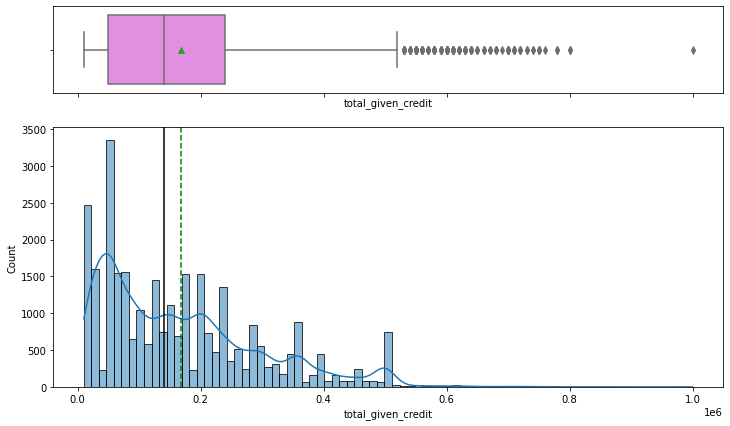

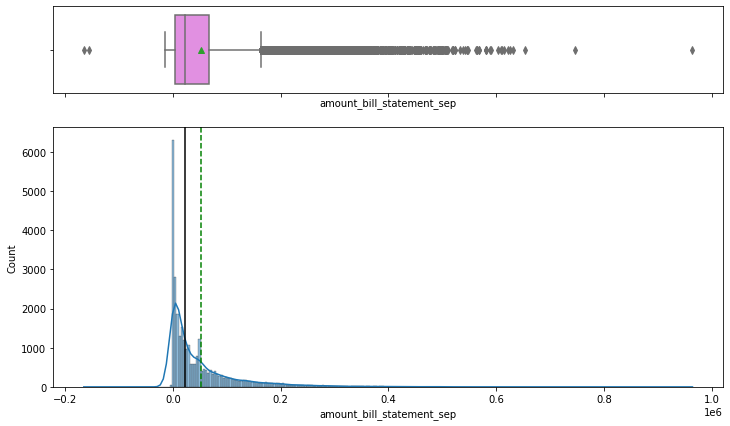

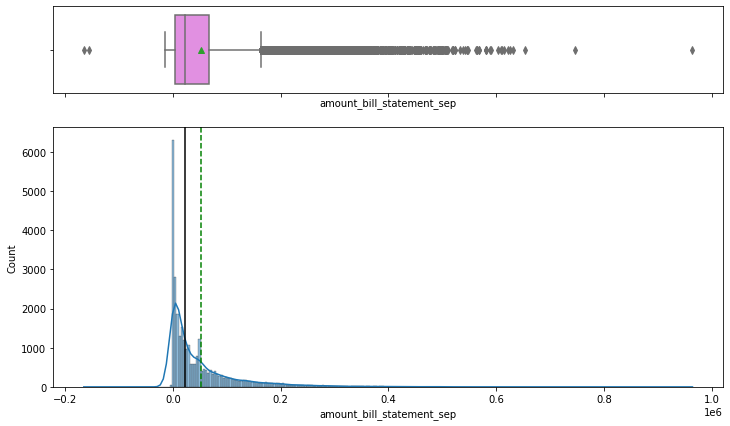

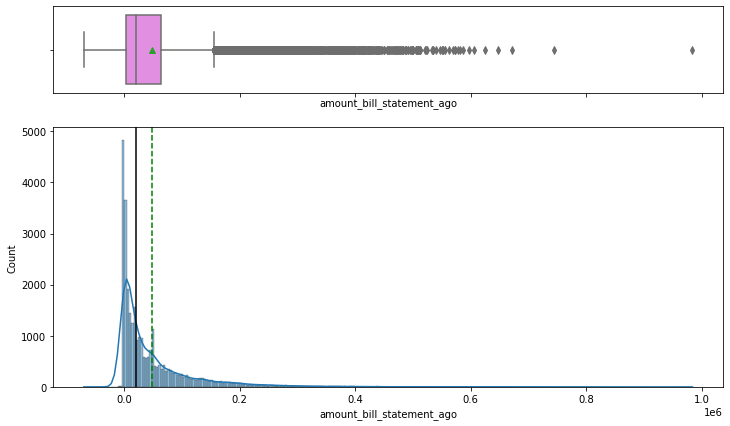

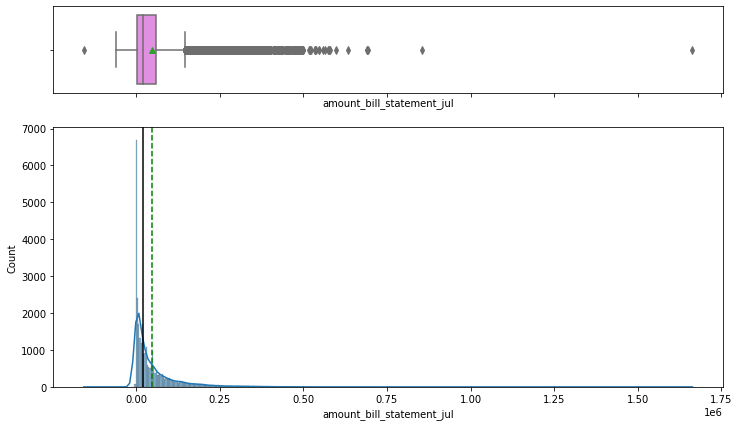

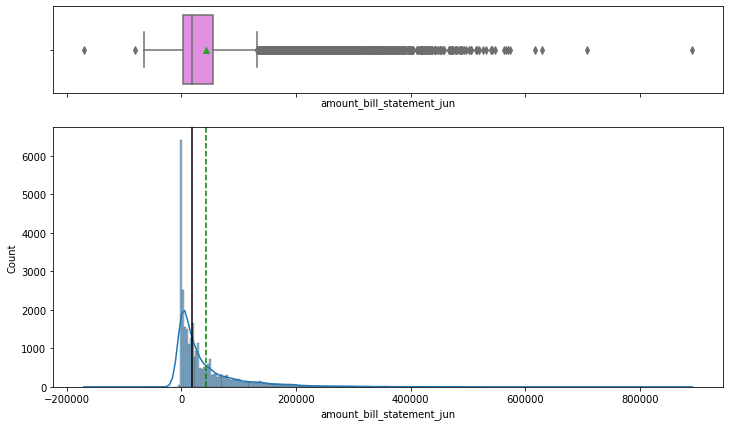

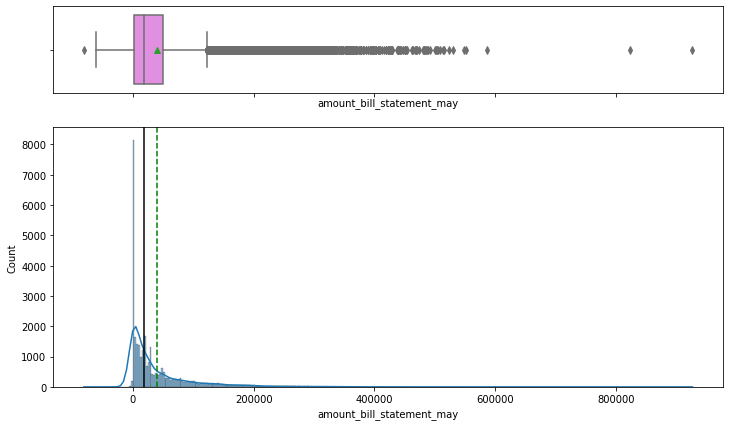

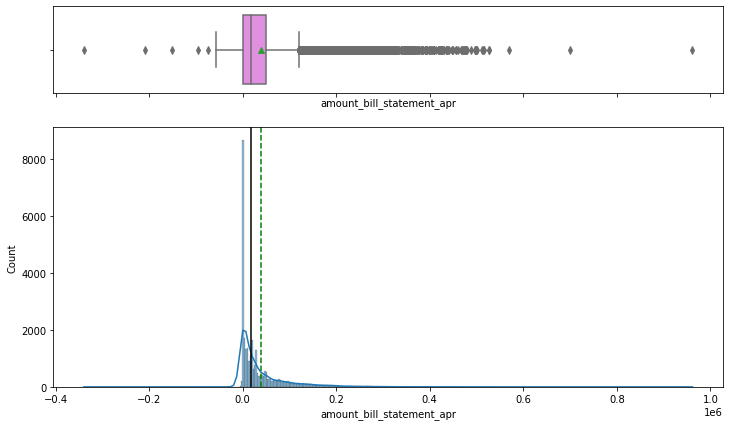

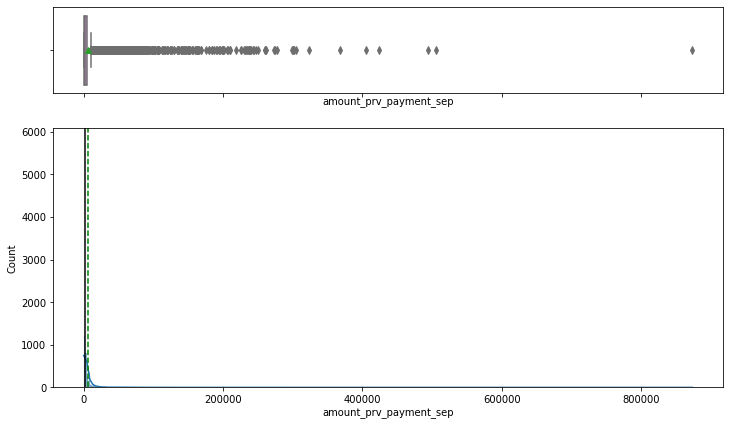

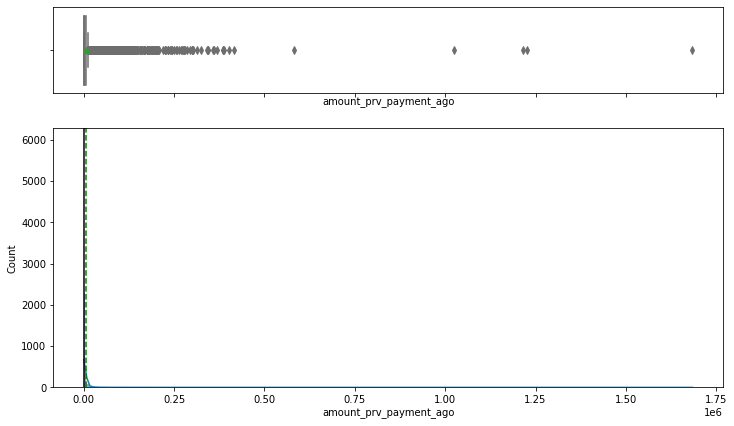

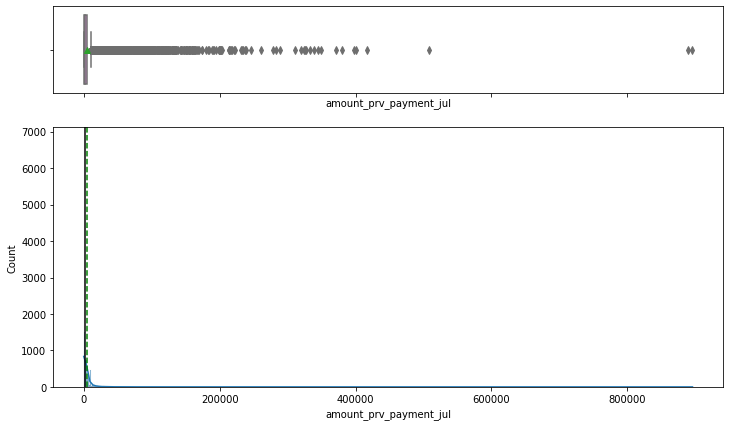

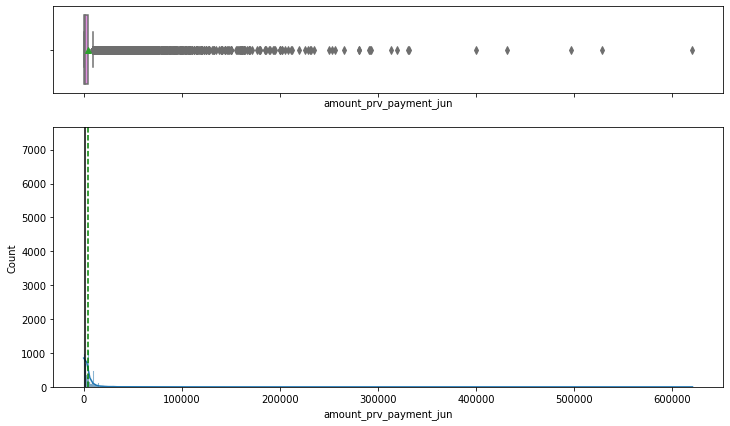

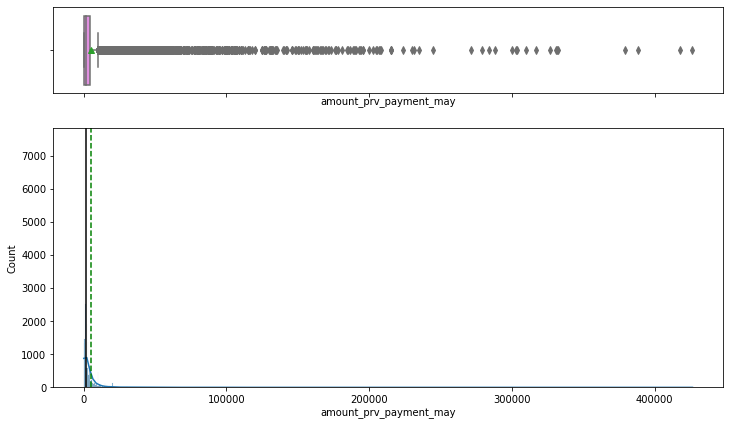

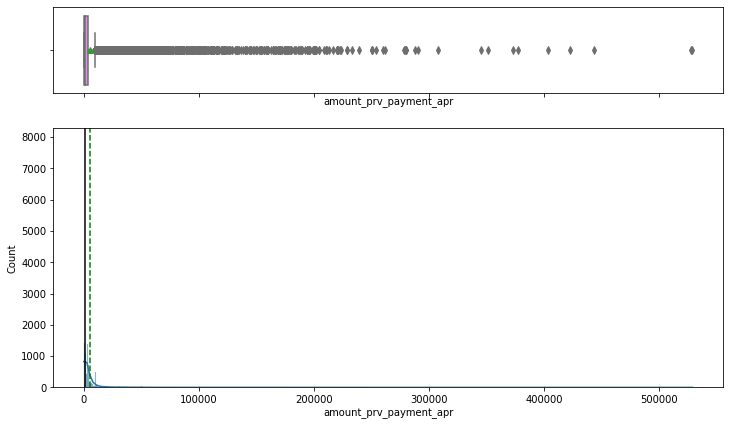

In [20]:
# Crea gráficos de distribución de las variables numéricas
for n in num:
    histogram_boxplot(data=df, feature=n, kde=True)

10. De las graficas anteriores vemos una clara disonancia entre las metricas y una clara distincion entre estados de cuenta y pagos de meses anteriores

In [31]:
# Se identifican las variables categoricas y se conservan las numericas
df_clean = df.drop(columns = categ)
df_clean

,total_given_credit,amount_bill_statement_sep,amount_bill_statement_ago,amount_bill_statement_jul,amount_bill_statement_jun,amount_bill_statement_may,amount_bill_statement_apr,amount_prv_payment_sep,amount_prv_payment_ago,amount_prv_payment_jul,amount_prv_payment_jun,amount_prv_payment_may,amount_prv_payment_apr
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29954,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29955,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29956,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Text(0.5, 1.0, 'Matriz de Correlación')

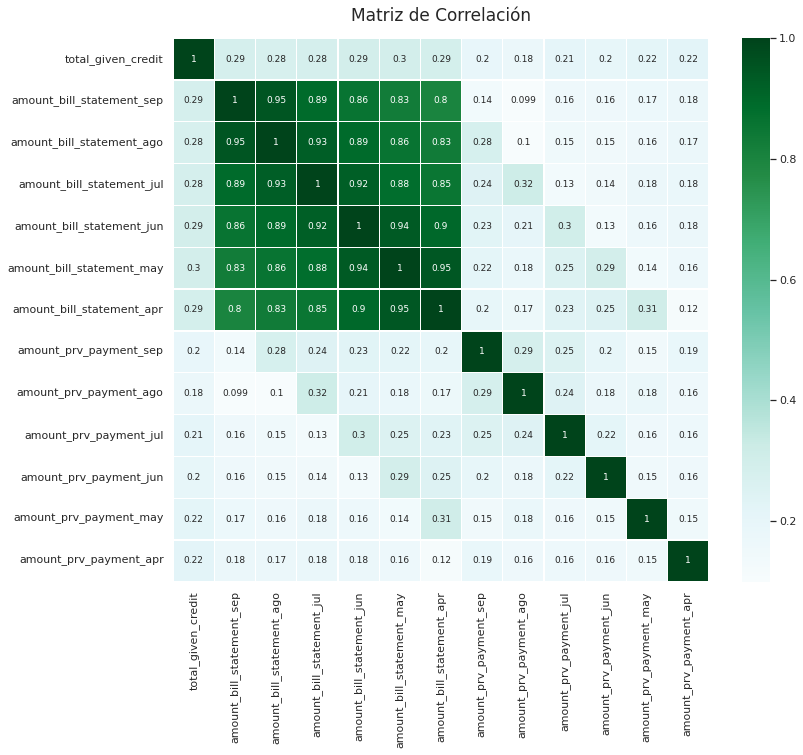

In [54]:
sns.set(rc={'figure.figsize':(12,10)}) 

sns.heatmap((df_clean.corr()), annot = True, annot_kws={'size':9}, cmap = 'BuGn', linewidths = 0.3, cbar = True).set_title('Matriz de Correlación', fontdict={'fontsize':17}, pad=17)

# Se correlacionan las variables continuas

10. Del heatmap anterior se observan que correlacionan mejor las variables de estado de cuenta y que las variables de pagos anteriores no tienen tanta relevancia

In [35]:
# De la matriz de correlacion se identifican las mas correlacionadas para su analisis
cols = ['amount_bill_statement_sep', 'amount_bill_statement_ago', 'amount_bill_statement_jul','amount_bill_statement_may', 'amount_bill_statement_apr']

In [36]:
summary = {
    "Varianzas": df_clean[cols].var(),
    "Valor Min": df_clean[cols].min(),
    "Valor Max": df_clean[cols].max()
}
pd.DataFrame(summary, index = cols).transpose()

#se genera una tabla para identificar las varianzas, de estas vemos son muy altas

,amount_bill_statement_sep,amount_bill_statement_ago,amount_bill_statement_jul,amount_bill_statement_may,amount_bill_statement_apr
Varianzas,5.427998e+09,5.071040e+09,4.814312e+09,3.699829e+09,3.550120e+09
Valor Min,-1.655800e+05,-6.977700e+04,-1.572640e+05,-8.133400e+04,-3.396030e+05
Valor Max,9.645110e+05,9.839310e+05,1.664089e+06,9.271710e+05,9.616640e+05


In [37]:
#Buscamos la varianza total de todas las variables
t = df_clean.var().sum()
t

45450192608.38694

In [38]:
#Calculamos la varianza para cada variable que estamos estudiando
var_ab_sep = df_clean.amount_bill_statement_sep.var()
var_ab_ago = df_clean.amount_bill_statement_ago.var()
var_ab_jul = df_clean.amount_bill_statement_jul.var()
var_ab_may = df_clean.amount_bill_statement_may.var()
var_ab_apr = df_clean.amount_bill_statement_apr.var()

In [39]:
#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t\t:',t.round(2) )
print('Varianza ab_sep \t:', ((var_ab_sep/t)*100).round(2),'%' )
print('Varianza ab_ago \t:', ((var_ab_ago/t)*100).round(2),'%' )
print('Varianza ab_jul \t:', ((var_ab_jul/t)*100).round(2),'%' )
print('Varianza ab_may \t:', ((var_ab_may/t)*100).round(2),'%' )
print('Varianza ab_apr \t:', ((var_ab_apr/t)*100).round(2),'%' )

#se observa la varianzas son muy altas por lo que procedemos a normalizar los datos

Varianza Total 		: 45450192608.39
Varianza ab_sep 	: 11.94 %
Varianza ab_ago 	: 11.16 %
Varianza ab_jul 	: 10.59 %
Varianza ab_may 	: 8.14 %
Varianza ab_apr 	: 7.81 %


#6.Escala los datos, si consideras necesario

In [40]:
# Se scala el conjunto
scaler = StandardScaler()
scaled = scaler.fit_transform(df_clean)


In [41]:
#Convertimos la información anterior en un dataframe, donde las columnas son las variables originales
scaled_df = pd.DataFrame(scaled, columns=df_clean.columns)
scaled_df.head()

,total_given_credit,amount_bill_statement_sep,amount_bill_statement_ago,amount_bill_statement_jul,amount_bill_statement_jun,amount_bill_statement_may,amount_bill_statement_apr,amount_prv_payment_sep,amount_prv_payment_ago,amount_prv_payment_jul,amount_prv_payment_jun,amount_prv_payment_may,amount_prv_payment_apr
0,-1.137363,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [42]:
summary_scaled = {
    "Varianzas": scaled_df[cols].var(),
    "Valor Min": scaled_df[cols].min(),
    "Valor Max": scaled_df[cols].max()
}
pd.DataFrame(summary_scaled, index = cols).transpose()

#de este resumen se observa que las varianzas tienen un rango uniforme

,amount_bill_statement_sep,amount_bill_statement_ago,amount_bill_statement_jul,amount_bill_statement_may,amount_bill_statement_apr
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-2.943086,-1.670797,-2.944427,-2.000207,-6.352483
Valor Max,12.396047,13.126386,23.305872,14.580173,15.487493


#7.Reduce las dimensiones con PCA, si consideras necesario. 




In [43]:
# Se realiza el PCA
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:5]

array([[-1.91808952e+00, -4.47504565e-01,  3.72798906e-01,
        -3.91569322e-02,  1.01868407e-01, -1.85385203e-01,
         5.99938947e-01, -2.34273812e-02,  1.10205572e-02,
         1.70189018e-02, -4.62474420e-03,  8.29817512e-03,
         1.10109508e-02],
       [-1.70250886e+00, -1.48080704e-01,  5.27250281e-02,
         1.39736613e-02, -4.93512178e-02,  1.49057113e-02,
         5.50706959e-02,  9.35382503e-02, -8.17497393e-02,
        -5.44367077e-03,  1.09240395e-02, -3.91941083e-03,
         1.77691185e-03],
       [-1.21960637e+00, -2.74838066e-01,  8.97271849e-02,
         1.17817395e-01, -3.53389435e-02, -8.57141847e-02,
         3.36877465e-01,  2.54000511e-02, -1.64524270e-02,
         1.12410976e-01, -8.05425000e-02, -4.13421828e-02,
        -5.70492231e-02],
       [-5.46563974e-01, -6.76178432e-01,  3.56169907e-01,
         8.15677234e-03,  1.08504631e-01, -2.07612542e-01,
         5.07752904e-01, -4.01303200e-02,  1.47076673e-01,
         1.68109254e-03,  1.38445837e

##7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [44]:
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df.round(4)
pcsSummary_df

#se genera una tabla de cada componente y su aportacion a la varianza acumulada

,% varianza explicada,% varianza acumulada
PC1,45.49,45.489337
PC2,13.17,58.658945
PC3,7.25,65.906564
PC4,6.80,72.706429
PC5,6.72,79.426559
PC6,6.02,85.444591
PC7,5.70,91.142363
PC8,5.59,96.729601
PC9,2.03,98.764218
PC10,0.55,99.310401


Se observa que en cuatro componentes se obtiene mas del 70% de la varianza de los datos

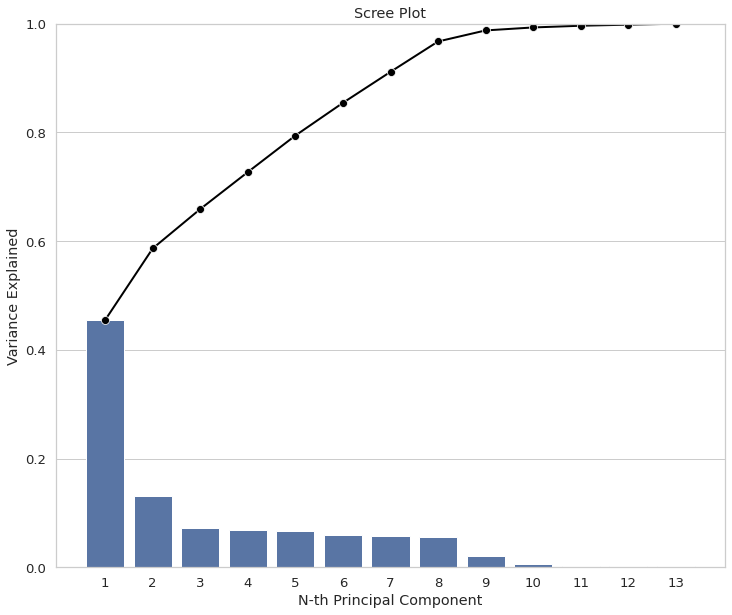

In [45]:
#Se crea Scree Plot

PC_components = np.arange(pcs.n_components_) + 1


_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(12, 10))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

10. De la grafica anterior se observa como de los primeros 4 componentes se obtienen arriba del 70% de la varianza de los datos.

In [46]:
#Creamos un dataframe con los valores de cada componente. De este resultado observamos
# que no hay perdida de informacion comparando los componenetes con el dataframe original

pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  13.000433955335978
Varianza total de los componentes:  13.000433955335971


##7.2 Indica la importancia de las variables en cada componente

In [47]:
total_var =scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

#se genera una tabla que nos indica la aportacion a la varianza por variable

,Porcentaje Varianza,Porcentaje Varianza Acumulado
total_given_credit,7.692308,7.692308
amount_bill_statement_sep,7.692308,15.384615
amount_bill_statement_ago,7.692308,23.076923
amount_bill_statement_jul,7.692308,30.769231
amount_bill_statement_jun,7.692308,38.461538
amount_bill_statement_may,7.692308,46.153846
amount_bill_statement_apr,7.692308,53.846154
amount_prv_payment_sep,7.692308,61.538462
amount_prv_payment_ago,7.692308,69.230769
amount_prv_payment_jul,7.692308,76.923077


In [58]:
comps_df = pd.DataFrame(
  pcs.components_.round(4),
  columns = pcs_df.columns,
  index = scaled_df.columns)
comps_df.iloc[:,:4]

# pcs.components nos da los pesos de cada uno de los componentes por variable

,PC1,PC2,PC3,PC4
total_given_credit,0.1648,0.3727,0.3835,0.3885
amount_bill_statement_sep,0.2940,-0.1907,-0.1741,-0.1258
amount_bill_statement_ago,-0.3929,-0.0744,0.0037,0.0725
amount_bill_statement_jul,0.0512,0.0408,0.0843,0.1110
amount_bill_statement_jun,-0.1044,-0.0387,-0.0250,0.1023
amount_bill_statement_may,0.2559,0.0032,-0.0332,-0.1154
amount_bill_statement_apr,-0.8003,0.0178,-0.0128,-0.0258
amount_prv_payment_sep,0.1061,0.0067,-0.1361,0.0969
amount_prv_payment_ago,-0.0312,0.5667,0.3869,0.1229
amount_prv_payment_jul,-0.0062,0.4160,0.0384,-0.4848


In [61]:
#Identificamos en absolutas las variables mas relevantes por componente
comps_df.iloc[:,:4].abs().idxmax()

PC1    amount_bill_statement_apr
PC2       amount_prv_payment_ago
PC3       amount_prv_payment_apr
PC4       amount_prv_payment_apr
dtype: object

#8.Elabora los histogramas de los atributos para visualizar su distribución

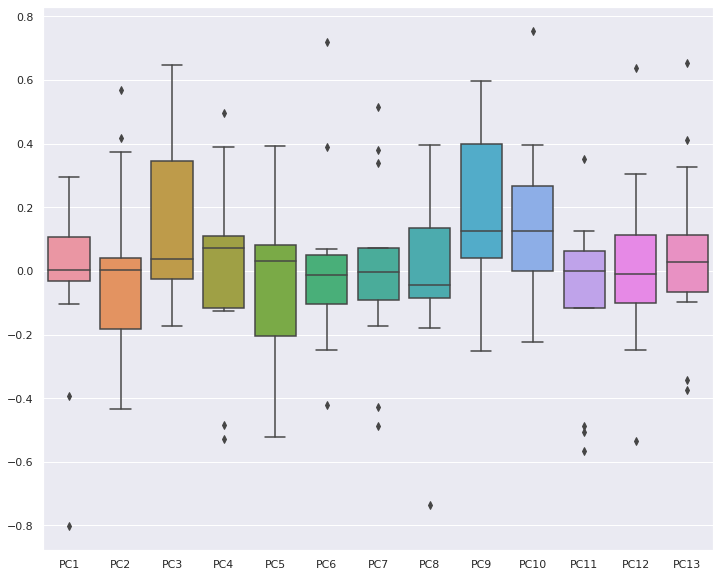

In [51]:
sns.set(rc={'figure.figsize':(12,10)}) 

sns.boxplot(data=comps_df)

#se grafica un boxplot para identificar los outliers

10. De el grafico de caja y bigotes observamos outliners en todos los componentes y un distribucion aceptable en los primeros cuatros componentes, especialmente en el primero que aporta alrededor del 45% de la varianza